Прохорова Анастасия Q4110
Технологии анализа данных
Построение модели

In [1]:

import seaborn as sns
import time

import pandas as pd
import numpy as np
import plotly.io as pio
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, mean_absolute_error, roc_auc_score, roc_curve, mean_squared_error

# Суть проекта
Задача: построить модель, выявляющую высокий риск развития заболеваний сердца. Датасет содержит 13 признаков, отклик: наличие или отсутствие заболеваний сердца, всего 270 записей.

# Анализ данных и визуализация

In [2]:
df = pd.read_csv('Heart_Disease_Prediction.csv')
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


*   Age - Возраст пациента.
*   Sex - Пол пациента.
*   Chest pain type - Тип боли в груди, испытываемой пациентом.
*   BP - Кровяное давление пациента.
*   Cholesterol - Уровень холестерина в крови пациента.
*   FBS over 120 - Превышает ли уровень сахара в крови пациента 120.
*   EKG results - Результаты электрокардиограммы, проведенной у пациента.
*   Max HR - Максимальный пульс, достигнутый пациентом во время упражнений.
*   Exercise angina - Испытывал ли пациент стенокардию во время упражнений.
*   ST depression - Степень депрессии сегмента ST на результатах ЭКГ.
*   Slope of ST - The slope of the ST segment on the EKG results.
*   Number of vessels fluro - Количество заблокированных сосудов при флуороскопии
*   Thallium - Результаты таллиевого стресс-теста, проведенного у пациента.
*   Heart Disease - Имеет ли пациент болезнь сердца.






In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

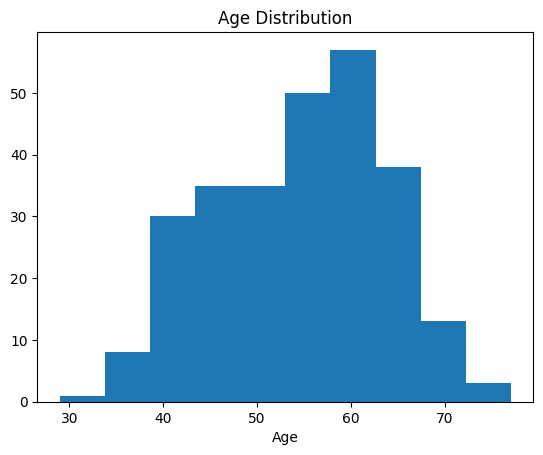

In [4]:
plt.hist(df['Age'], bins=10)
plt.xlabel('Age')
plt.title('Age Distribution')
plt.show()

<Axes: xlabel='Sex', ylabel='count'>

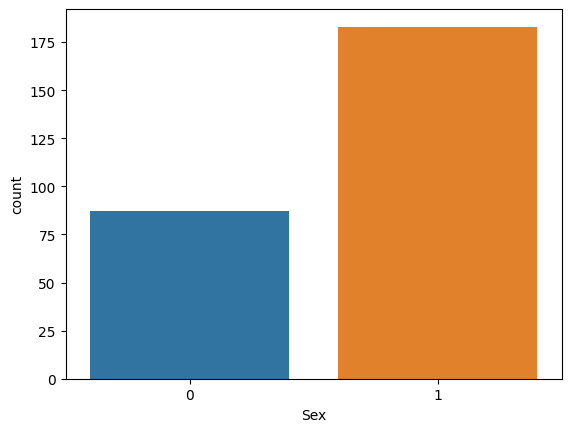

In [5]:
sns.countplot(x='Sex', data=df)

<Axes: xlabel='Heart Disease', ylabel='count'>

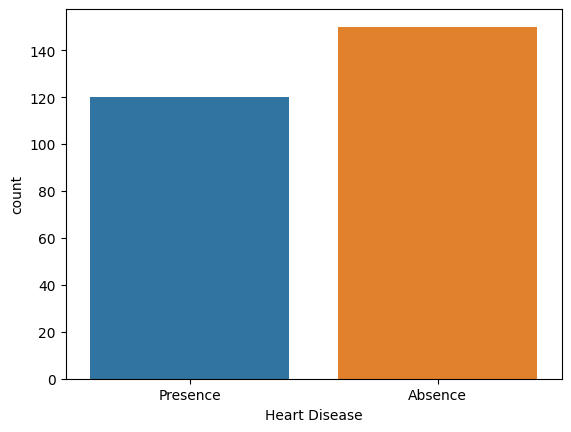

In [6]:
sns.countplot(x='Heart Disease', data=df)

<Axes: xlabel='Chest pain type', ylabel='count'>

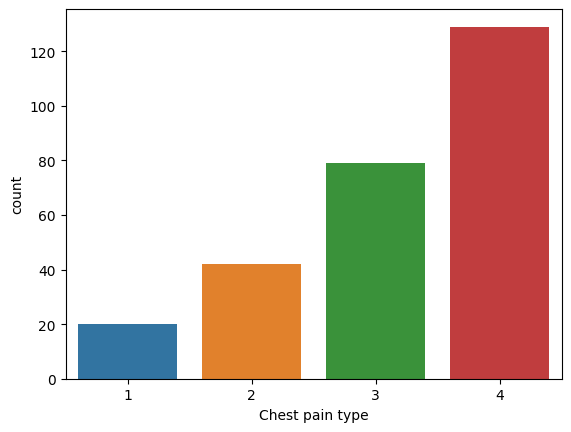

In [7]:
sns.countplot(x='Chest pain type', data=df)

<Axes: xlabel='FBS over 120', ylabel='count'>

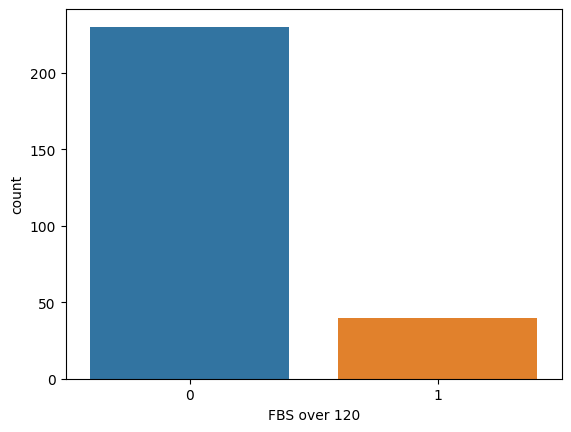

In [8]:
sns.countplot(x='FBS over 120', data=df)

<Axes: xlabel='EKG results', ylabel='count'>

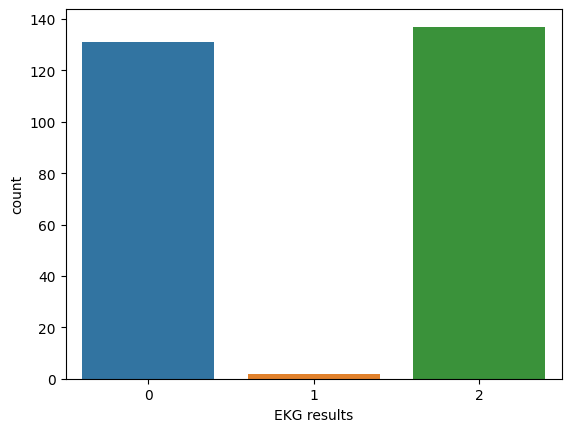

In [9]:
sns.countplot(x='EKG results', data=df)

# Подготовка данных

проведем прямое кодирование и масштабирование признаков

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(df['Heart Disease'])
df['Heart Disease']=encoder.transform(df['Heart Disease'])

In [11]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x = np.array(df.drop(columns='Heart Disease'))
y = np.array(df['Heart Disease'])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Создание и обучение моделей

Обучим и сравним несколько моделей, традиционно применяющихся для решения задачи классификации:

*   Логистическая регрессия
*   Метод k ближайших соседей
*   Дерево решений
*   Случайный лес
*   Метод опорных векторов





In [16]:
results = {}

In [17]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [18]:
start_time = time.time()
logistic = LogisticRegression()
logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['Logistic Regression'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

In [19]:
start_time = time.time()
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['K-Nearest Neighbors (KNN)'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

In [20]:
start_time = time.time()
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['Decision Trees'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

In [21]:
start_time = time.time()
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['Random Forest'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

In [22]:
start_time = time.time()
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['Support Vector Machines'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

# Результаты

In [23]:
df_results = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Training Time'])

df_results

,Accuracy,Precision,Recall,F1-Score,Training Time
Logistic Regression,0.907407,0.907190,0.907407,0.906969,0.015627
K-Nearest Neighbors (KNN),0.814815,0.815757,0.814815,0.810359,0.016203
Decision Trees,0.685185,0.715812,0.685185,0.688997,0.005233
Random Forest,0.814815,0.822792,0.814815,0.807099,0.406439
Support Vector Machines,0.888889,0.889223,0.888889,0.887745,0.016425


наилучший результат по точности и f1 показали модели Logistic Regression и SVM

визуализируем их результаты с помощью confusion matrix

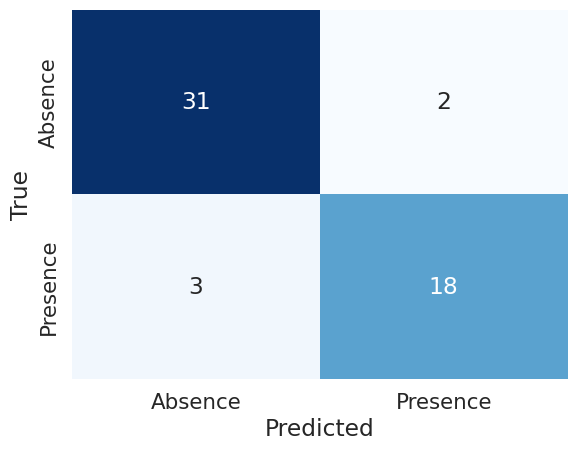

In [24]:
from sklearn.metrics import confusion_matrix
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_predicted = lr.predict(X_test)

lr_conf_matrix = confusion_matrix(y_test, lr_predicted)

sns.set(font_scale=1.4)
sns.heatmap(lr_conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=['Absence', 'Presence'], yticklabels=['Absence', 'Presence'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

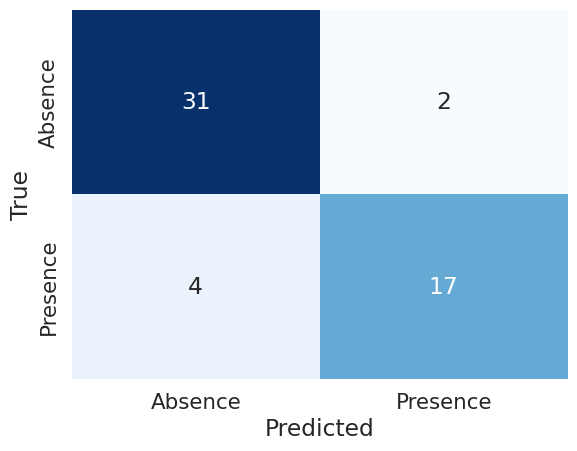

In [26]:
svm = SVC()
svm.fit(X_train,y_train)
svm_predicted = svm.predict(X_test)

svm_conf_matrix = confusion_matrix(y_test, svm_predicted)

sns.set(font_scale=1.4)
sns.heatmap(svm_conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=['Absence', 'Presence'], yticklabels=['Absence', 'Presence'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()